In [8]:
import cv2
import numpy as np
from keras.models import load_model

In [9]:
model=load_model('model_file_30epochs.h5')

In [10]:
faceDetect=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [11]:
# labeling
labels_dict={0:'Angry',1:'Disgust', 2:'Fear', 3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

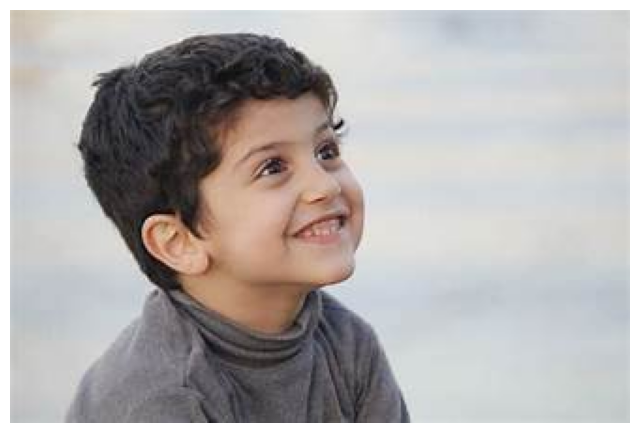

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained face detection model
faceDetect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the model 
labels_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Load the image
frame = cv2.imread("happy.jpeg")

# Check if the image was successfully loaded
if frame is not None:
    # Convert the image to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale image
    faces = faceDetect.detectMultiScale(gray, 1.3, 3)
    
    # Iterate over detected faces
    for x, y, w, h in faces:
        # Extract the face region
        sub_face_img = gray[y:y+h, x:x+w]
        
        # Resize and normalize the face region
        resized = cv2.resize(sub_face_img, (48, 48))
        normalize = resized / 255.0
        reshaped = np.reshape(normalize, (1, 48, 48, 1))
        
        # Make predictions using your model
        result = model.predict(reshaped)
        label = np.argmax(result, axis=1)[0]
        
        # Draw rectangles around faces
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 1)
        
        # Draw labels with emotion name to the right of the bounding box
        label_name = labels_dict[label]
        label_size = cv2.getTextSize(label_name, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)[0]
        cv2.putText(frame, label_name, (x + w + 10, y + label_size[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
        
    # Convert BGR image to RGB for displaying in Matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Display the image with labels
    plt.figure(figsize=(8, 6))
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()
else:
    print("Error: Unable to load the image.")


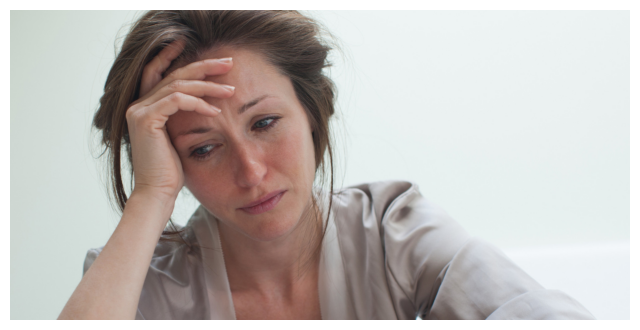

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained face detection model
faceDetect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the image
frame = cv2.imread("sad.jpg")

# Check if the image was successfully loaded
if frame is not None:
    # Convert the image to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale image
    faces = faceDetect.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Iterate over detected faces
    for (x, y, w, h) in faces:
        # Draw rectangles around faces
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        
        # Add label "Happy" next to the face rectangle
        cv2.putText(frame, "Sad", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
        
    # Convert BGR image to RGB for displaying in Matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Display the image with face rectangles and labels
    plt.figure(figsize=(8, 6))
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()
else:
    print("Error: Unable to load the image.")
